# I Love You
This Jupyter Notebook describes the procedure to apply Priciple Component Analysis to a data set obtained from the survey from your thesis. for some reason the data set you gave mein a csv file contained only 5 rows.
This procedure can be applied to many more rows and maybe the results could be more revealing.
This is my present to you for our 3 year aniversary of knowing each other and having experienced beautiful moments together.

In [103]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

This procedure is based on https://www.youtube.com/watch?v=Lsue2gEM9D0 and https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py

## Import and prepare data

In [104]:
data=pd.read_csv("survey_data.csv", header=0, delimiter=";",encoding = "ISO-8859-1")

In [105]:
data.head()

,_Antwort-ID,2. Question 2/15 Which age bracket do you belong to?,3. Question 3/15 Which gender do you identify as?,"5. Question 5/15 How often do you consume plant-based milk alternatives, such as oat milk, almond milk, soy milk, etc.?",Score Benefits,Score Values,Final Score,Info Received,Consumer Acceptance Before Benefit Information,Consumer Acceptance After Packaging Information,...,15. 12/15 Imagine consuming powdered plant-based milk alternatives. Which product features would be more important to you?,Appearance (1) - Easier transport (6),Flavour (1) - Easier transport (6),Texture (1) - Easier transport (6),Appearance (1) - Mixing your own flavours (6),Flavour (1) - Mixing your own flavours (6),Texture (1) - Mixing your own flavours (6),16. 13/15 What is your current employment status?,17. 14/15 Do you have kids?,"18. 15/15 What is your households total net income (after tax) per month? If you dont know the exact figure, please give an estimate."
0,65050219,25 to 34 years,Female,Less than once per month,1,"0,8","0,9",Packaging,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,3000 to under 5000
1,65050081,25 to 34 years,Female,One to three times per month,"0,3","0,8","0,5",Packaging,20,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,2000 to under 2500
2,64443035,25 to 34 years,Female,Less than once per month,"0,3","0,8","0,6",Packaging,80,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,2500 to under 3000
3,64165242,25 to 34 years,Female,Less than once per month,"0,6","0,8","0,7",Packaging,10,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,5000 or more
4,63855730,25 to 34 years,Male,Three or more times per week,"0,7","0,8","0,8",Packaging,30,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,nein,1000 to under 1500


In [106]:
colNames = data.columns.values
colNames[3] = "'5. Question 5/15    How often do you consume plant-based milk alternatives"
colNames[13] = "'12. 10/15    Think of the plant-based milk alternative that you currently consume most often"
colNames[26] = "'14. 12/15    Imagine consuming powdered plant-based milk alternatives"
colNames[30] = "'15. 12/15    Imagine consuming powdered plant-based milk alternatives"
colNames[39] = "'18. 15/15    What is your households total net income (after tax) per month"

In [107]:
colNames

array(['_Antwort-ID',
       '2. Question 2/15    Which age bracket do you belong to?',
       '3. Question 3/15    Which gender do you identify as?',
       "'5. Question 5/15    How often do you consume plant-based milk alternatives",
       'Score Benefits', 'Score Values', 'Final Score', 'Info Received',
       'Consumer Acceptance Before Benefit Information',
       'Consumer Acceptance After Packaging Information',
       'Consumer Acceptance After Convenience Information',
       'Change in Consumer Acceptance Packaging',
       'Change in Consumer Acceptance Convenience',
       "'12. 10/15    Think of the plant-based milk alternative that you currently consume most often",
       'Change Importance Appearance - Packaging Benefit',
       'Change Importance Flavour - Packaging Benefit',
       'Change Importance Texture - Packaging Benefit',
       'Change Importance Appearance - Transport Benefit',
       'Change Importance Flavour - Transport Benefit',
       'Change Importan

### Replacing the header with the shorter names

In [108]:
data.columns = colNames
data.head()

,_Antwort-ID,2. Question 2/15 Which age bracket do you belong to?,3. Question 3/15 Which gender do you identify as?,'5. Question 5/15 How often do you consume plant-based milk alternatives,Score Benefits,Score Values,Final Score,Info Received,Consumer Acceptance Before Benefit Information,Consumer Acceptance After Packaging Information,...,'15. 12/15 Imagine consuming powdered plant-based milk alternatives,Appearance (1) - Easier transport (6),Flavour (1) - Easier transport (6),Texture (1) - Easier transport (6),Appearance (1) - Mixing your own flavours (6),Flavour (1) - Mixing your own flavours (6),Texture (1) - Mixing your own flavours (6),16. 13/15 What is your current employment status?,17. 14/15 Do you have kids?,'18. 15/15 What is your households total net income (after tax) per month
0,65050219,25 to 34 years,Female,Less than once per month,1,"0,8","0,9",Packaging,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,3000 to under 5000
1,65050081,25 to 34 years,Female,One to three times per month,"0,3","0,8","0,5",Packaging,20,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,2000 to under 2500
2,64443035,25 to 34 years,Female,Less than once per month,"0,3","0,8","0,6",Packaging,80,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,2500 to under 3000
3,64165242,25 to 34 years,Female,Less than once per month,"0,6","0,8","0,7",Packaging,10,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,nein,5000 or more
4,63855730,25 to 34 years,Male,Three or more times per week,"0,7","0,8","0,8",Packaging,30,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,nein,1000 to under 1500


### Removing columns without any values "NAN"

In [109]:
data_no_NAN = data.dropna(axis=1, how='all')

In [110]:
data_no_NAN.dtypes

_Antwort-ID                                                                                       int64
2. Question 2/15    Which age bracket do you belong to?                                          object
3. Question 3/15    Which gender do you identify as?                                             object
'5. Question 5/15    How often do you consume plant-based milk alternatives                      object
Score Benefits                                                                                   object
Score Values                                                                                     object
Final Score                                                                                      object
Info Received                                                                                    object
Consumer Acceptance Before Benefit Information                                                    int64
Consumer Acceptance After Packaging Information                 

In [111]:
data_oneHotEncoding = pd.get_dummies(data_no_NAN)
data_oneHotEncoding.head()

,_Antwort-ID,Consumer Acceptance Before Benefit Information,Consumer Acceptance After Packaging Information,Change in Consumer Acceptance Packaging,Change Importance Appearance - Packaging Benefit,Change Importance Flavour - Packaging Benefit,Change Importance Texture - Packaging Benefit,Appearance before benefit,Flavour before benefit,Texture before benefit,...,'12. 10/15 Think of the plant-based milk alternative that you currently consume most often_less than 5,'12. 10/15 Think of the plant-based milk alternative that you currently consume most often_5-10,16. 13/15 What is your current employment status?_Employed,16. 13/15 What is your current employment status?_Other,17. 14/15 Do you have kids?_nein,'18. 15/15 What is your households total net income (after tax) per month_1000 to under 1500,'18. 15/15 What is your households total net income (after tax) per month_2000 to under 2500,'18. 15/15 What is your households total net income (after tax) per month_2500 to under 3000,'18. 15/15 What is your households total net income (after tax) per month_3000 to under 5000,'18. 15/15 What is your households total net income (after tax) per month_5000 or more
0,65050219,0,20,20,-2,0,0,5,1,2,...,0,0,1,0,1,0,0,0,1,0
1,65050081,20,40,20,0,0,1,2,1,1,...,1,0,1,0,1,0,1,0,0,0
2,64443035,80,100,20,3,1,2,3,1,1,...,0,1,1,0,1,0,0,1,0,0
3,64165242,10,30,20,0,0,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1
4,63855730,30,50,20,2,1,1,2,1,1,...,1,0,0,1,1,1,0,0,0,0


In [170]:
Names_data_oneHotEncoding = data_oneHotEncoding.columns.values

In [171]:
Names_data_oneHotEncoding

array(['_Antwort-ID', 'Consumer Acceptance Before Benefit Information',
       'Consumer Acceptance After Packaging Information',
       'Change in Consumer Acceptance Packaging',
       'Change Importance Appearance - Packaging Benefit',
       'Change Importance Flavour - Packaging Benefit',
       'Change Importance Texture - Packaging Benefit',
       'Appearance before benefit', 'Flavour before benefit',
       'Texture before benefit', 'Appearance (1) - Reduced packaging (6)',
       'Flavour (1) - Reduced packaging (6)',
       'Texture (1) - Reduced packaging (6)',
       '2. Question 2/15    Which age bracket do you belong to?_25 to 34 years',
       '2. Question 2/15    Which age bracket do you belong to?_35 to 44 years',
       '3. Question 3/15    Which gender do you identify as?_Female',
       '3. Question 3/15    Which gender do you identify as?_Male',
       "'5. Question 5/15    How often do you consume plant-based milk alternatives_Less than once per month",
       "'

### center and scale the data also called normalize

In [112]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_oneHotEncoding)
scaled_data[0:2]

array([[ 1.29401474, -1.1721057 , -1.1721057 ,  0.        , -1.64316767,
        -0.89442719, -0.89442719,  1.87082869, -0.4472136 ,  1.41421356,
        -0.35355339, -0.78086881,  0.        ,  0.4472136 , -0.4472136 ,
         0.70710678, -0.70710678,  1.        , -0.4472136 , -0.70710678,
        -0.70710678, -0.70710678, -0.4472136 ,  2.23606798,  0.        ,
        -0.4472136 , -0.4472136 , -0.70710678, -0.4472136 ,  2.23606798,
         0.        ,  1.41421356, -0.70710678, -0.70710678,  0.4472136 ,
        -0.4472136 ,  0.        , -0.4472136 , -0.4472136 , -0.4472136 ,
         1.41421356, -0.4472136 ],
       [ 1.29373968, -0.50233101, -0.50233101,  0.        , -0.54772256,
        -0.89442719,  0.4472136 , -0.53452248, -0.4472136 , -0.70710678,
        -0.88388348, -0.78086881,  0.        ,  0.4472136 , -0.4472136 ,
         0.70710678, -0.70710678, -1.        ,  2.23606798, -0.70710678,
         1.41421356, -0.70710678, -0.4472136 , -0.4472136 ,  0.        ,
         2.23606

## Perform PCA on the data

In [114]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

### Draw a scree plot and a PCA plot

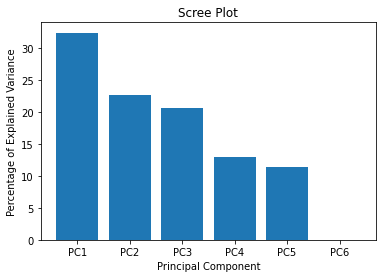

In [115]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

## Determine which genes had the biggest influence on PC1

### Get the name of the top 10 measurements (genes) that contribute most to pc1

In [173]:
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=Names_data_oneHotEncoding)
loading_scores.head()

_Antwort-ID                                        -2.300661e-01
Consumer Acceptance Before Benefit Information      2.189538e-01
Consumer Acceptance After Packaging Information     2.189538e-01
Change in Consumer Acceptance Packaging            -1.101784e-16
Change Importance Appearance - Packaging Benefit    2.468039e-01
dtype: float64

In [174]:
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [175]:
# get the names of the top 10 genes
top_10_variables = sorted_loading_scores[0:10].index.values

In [176]:
# print the question and their scores (and +/- sign)
loading_scores[top_10_variables]

Change Importance Flavour - Packaging Benefit                                                               0.281228
Flavour (1) - Reduced packaging (6)                                                                         0.272738
Change Importance Appearance - Packaging Benefit                                                            0.246804
3. Question 3/15    Which gender do you identify as?_Male                                                   0.244423
'5. Question 5/15    How often do you consume plant-based milk alternatives_Three or more times per week    0.244423
3. Question 3/15    Which gender do you identify as?_Female                                                -0.244423
_Antwort-ID                                                                                                -0.230066
Appearance (1) - Reduced packaging (6)                                                                      0.228277
Consumer Acceptance Before Benefit Information                  

### Observing PC1, PC2 and PC3

In [180]:
# loading scores for PC1
loading_scores = pd.Series(pca.components_[0], index=Names_data_oneHotEncoding)
loading_scores.abs().sort_values(ascending=False).head(10)

Change Importance Flavour - Packaging Benefit                                                               0.281228
Flavour (1) - Reduced packaging (6)                                                                         0.272738
Change Importance Appearance - Packaging Benefit                                                            0.246804
3. Question 3/15    Which gender do you identify as?_Male                                                   0.244423
'5. Question 5/15    How often do you consume plant-based milk alternatives_Three or more times per week    0.244423
3. Question 3/15    Which gender do you identify as?_Female                                                 0.244423
_Antwort-ID                                                                                                 0.230066
Appearance (1) - Reduced packaging (6)                                                                      0.228277
Consumer Acceptance Before Benefit Information                  

In [181]:
# loading scores for PC2
loading_scores = pd.Series(pca.components_[1], index=Names_data_oneHotEncoding)
loading_scores.abs().sort_values(ascending=False).head(10)

'12. 10/15    Think of the plant-based milk alternative that you currently consume most often_less than 5    0.297705
'18. 15/15    What is your households total net income (after tax) per month_1000 to under 1500             0.259515
Final Score_0,8                                                                                               0.259515
16. 13/15    What is your current employment status?_Other                                                    0.259515
Score Benefits_0,7                                                                                            0.259515
16. 13/15    What is your current employment status?_Employed                                                 0.259515
'18. 15/15    What is your households total net income (after tax) per month_3000 to under 5000             0.255049
Texture before benefit                                                                                        0.255049
Change Importance Texture - Packaging Benefit   

In [183]:
# loading scores for PC3
loading_scores = pd.Series(pca.components_[2], index=Names_data_oneHotEncoding)
loading_scores.abs().sort_values(ascending=False).head(10)

Final Score_0,6                                                                                         0.315069
'18. 15/15    What is your households total net income (after tax) per month_2500 to under 3000       0.315069
Score Benefits_0,3                                                                                      0.310906
Texture (1) - Reduced packaging (6)                                                                     0.280849
Change Importance Texture - Packaging Benefit                                                           0.272189
Consumer Acceptance Before Benefit Information                                                          0.225351
Consumer Acceptance After Packaging Information                                                         0.225351
'12. 10/15    Think of the plant-based milk alternative that you currently consume most often_5-10    0.219784
Appearance (1) - Reduced packaging (6)                                                          

### Try showing a 3D plot

In [186]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

Text(0.5, 0, 'PC_3')

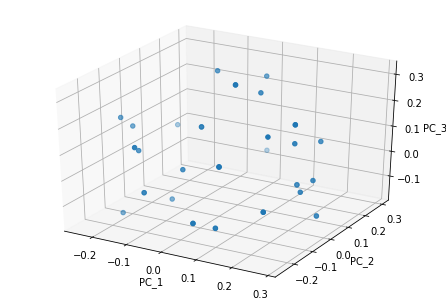

In [193]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2])
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

Text(0.5, 0, 'PC_3')

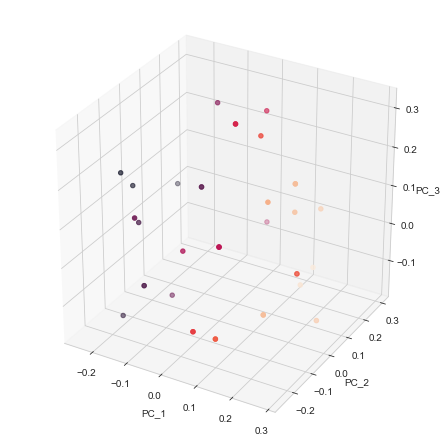

In [195]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = pca.components_[0]
y = pca.components_[1]
z = pca.components_[2]


ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')

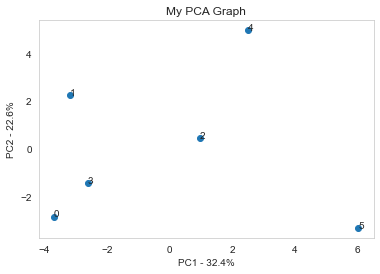

In [217]:
#the following code makes a plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

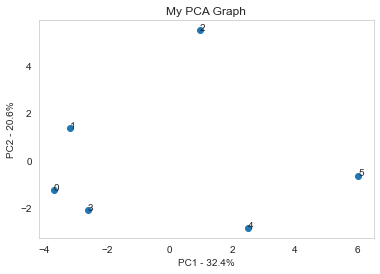

In [218]:
#the following code makes a plot using PC1 and PC3
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC3)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[2]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC3.loc[sample]))
 
plt.show()

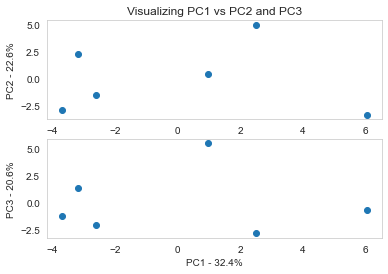

In [219]:
x1 = pca_df.PC1
x2 = pca_df.PC1

y1 = pca_df.PC2
y2 = pca_df.PC3

plt.subplot(2, 1, 1)
plt.scatter(x1, y1)
plt.title('Visualizing PC1 vs PC2 and PC3')
plt.ylabel('PC2 - {0}%'.format(per_var[1]))


plt.subplot(2, 1, 2)
plt.scatter(x2, y2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))

plt.show()

Samples on the left side (0,1,3) are correlated with each other. Samples on the right side seam to have an opposite tendency however not strogly correlated